In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/ecommerce_customer_data_large.csv")

Uderstanding the data

In [ ]:
df.shape

(250000, 13)

In [ ]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [ ]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47382
Customer Name,0


In [ ]:
df.dropna(inplace =True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Drop unnecessary columns
df.drop(['Customer Name'], axis=1, inplace=True)
df.drop(['Age'], axis=1, inplace=True)

df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.0,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1486,Cash,27,1.0,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,4327,Cash,27,0.0,Female,0
11,33969,2023-01-05 11:15:27,Home,304,1,3883,PayPal,27,1.0,Male,0
12,33969,2023-07-18 23:36:50,Books,54,2,4187,PayPal,27,0.0,Male,0


Data Type Conversion

In [ ]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [ ]:
df.dtypes

,0
Customer ID,int64
Purchase Date,datetime64[ns]
Product Category,object
Product Price,int64
Quantity,int64
Total Purchase Amount,int64
Payment Method,object
Customer Age,int64
Returns,float64
Gender,object


In [ ]:
# Convert 'Purchase Date' to datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Extract year and month from 'Purchase Date'
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month
# Extract Year, Month, and Day
df['Purchase Day'] = df['Purchase Date'].dt.day

# Extract Day of Week (0=Monday, 6=Sunday)
df['Purchase Day of Week'] = df['Purchase Date'].dt.dayofweek

# Classify Weekends
df['Is Weekend'] = df['Purchase Day of Week'].apply(lambda x: 1 if x >= 5 else 0)



In [ ]:
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn,Purchase Year,Purchase Month,Age Group,Customer Segment,Purchase Day,Purchase Day of Week,Is Weekend
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,Female,0,2023,5,31-40,Medium Value,3,2,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,Female,0,2021,5,31-40,Medium Value,16,6,1
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,Female,0,2020,7,31-40,Medium Value,13,0,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,Female,0,2023,1,31-40,Medium Value,17,1,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,Female,0,2021,5,31-40,Medium Value,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249994,39806,2021-08-01 04:43:12,Electronics,225,5,5293,Credit Card,60,0.0,Female,0,2021,8,51-60,High Value,1,6,1
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Male,0,2023,1,60+,High Value,24,1,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Female,0,2021,6,60+,High Value,4,4,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Male,0,2021,6,60+,Medium Value,27,6,1


outlier

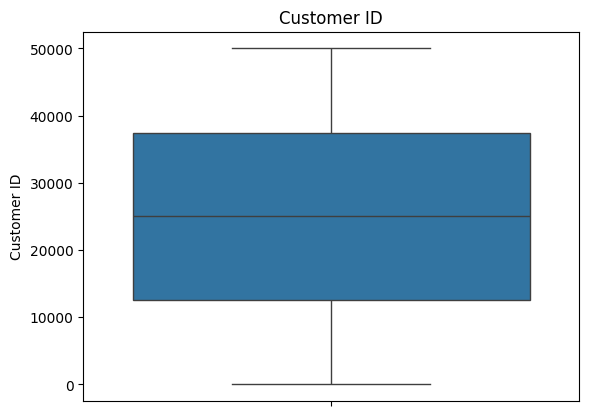

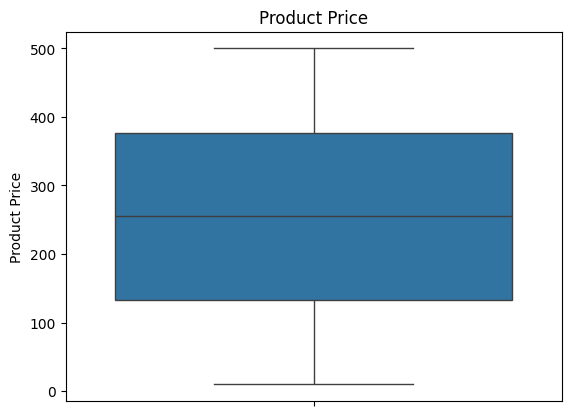

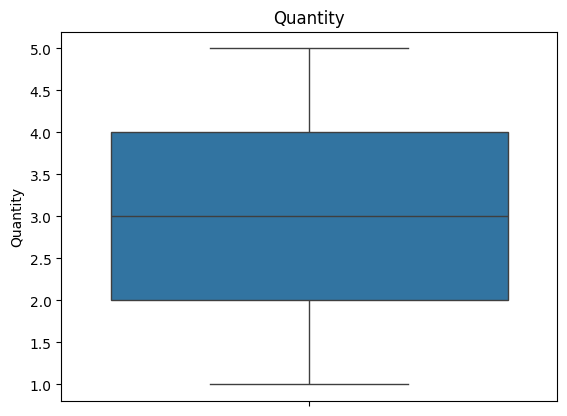

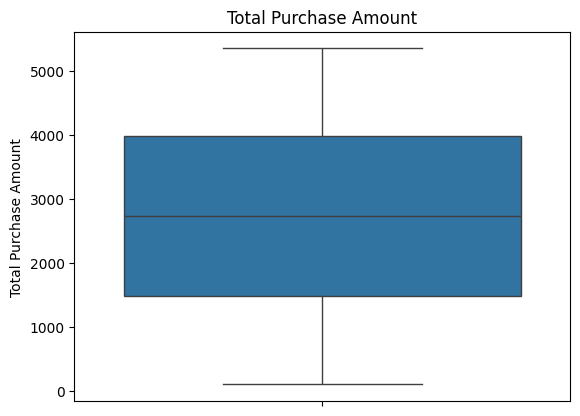

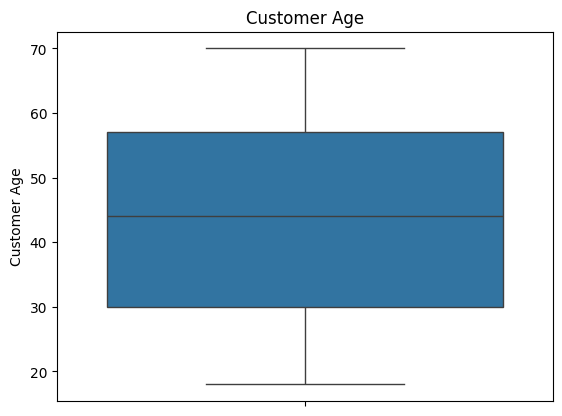

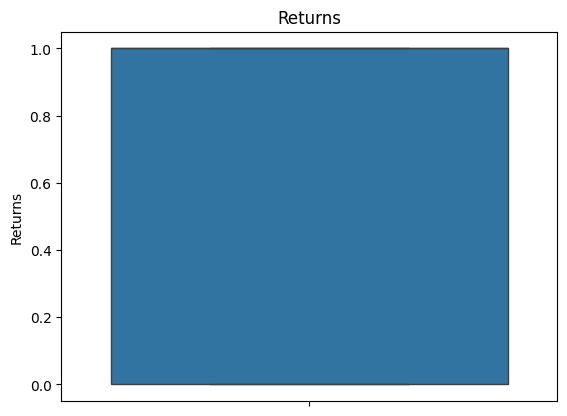

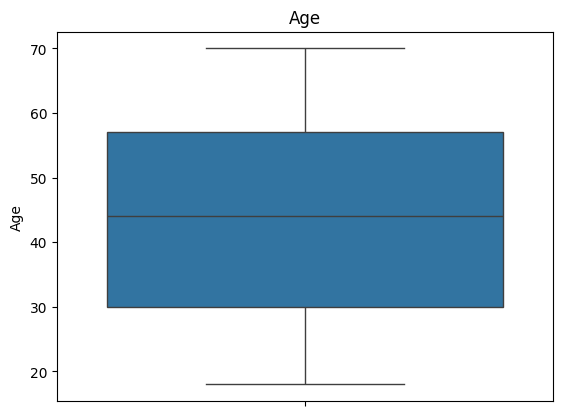

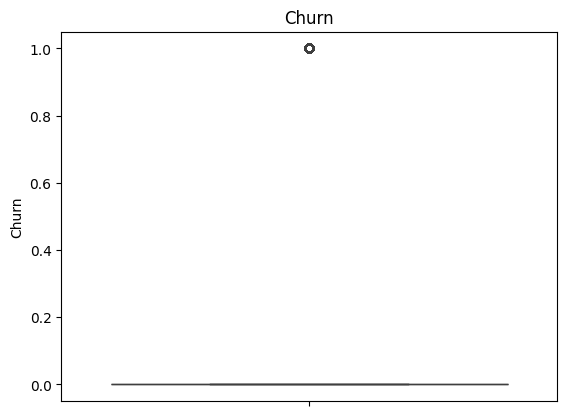

In [ ]:
for i in df:
  if df[i].dtypes=='int' or df[i].dtypes=='float':
    sns.boxplot(df[i])
    plt.title(f'{i}')
    plt.show()

Customer Analysis

In [ ]:
# Customer Analysis
# Categorizing Customers by Age
age_ranges = [0, 10, 20, 30, 40, 50, 60, np.inf]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Categorize customers into age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_ranges, labels=age_labels)



<ipython-input-46-bc67ec551c6d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age Group', order=age_labels, palette=palette)


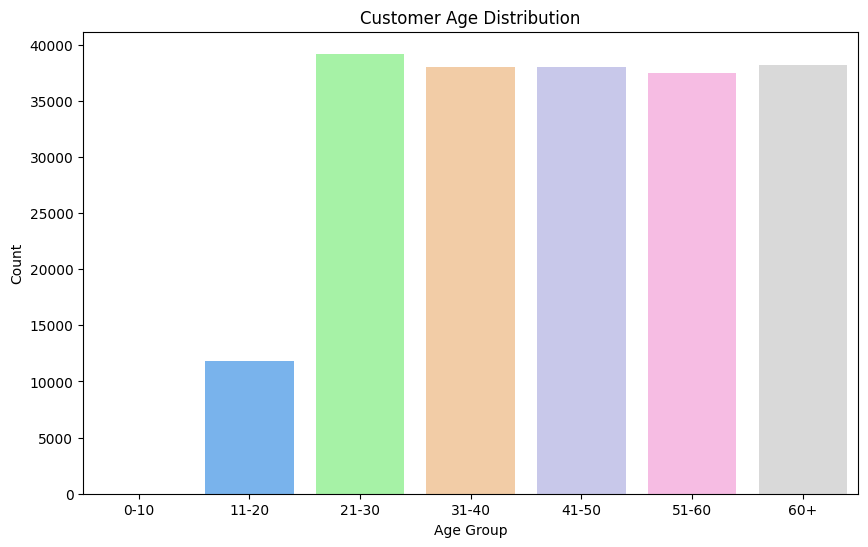

In [ ]:
palette = {
    '0-10': '#ff9999',  # red
    '11-20': '#66b3ff',  # blue
    '21-30': '#99ff99',  # green
    '31-40': '#ffcc99',  # orange
    '41-50': '#c2c2f0',  # purple
    '51-60': '#ffb3e6',  # pink
    '60+': '#d9d9d9'     # gray
}

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Group', order=age_labels, palette=palette)
plt.title('Customer Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
# Analyzing Gender Distribution
gender_counts = df['Gender'].value_counts()
gender_counts

,count
Gender,
Male,101919
Female,100699


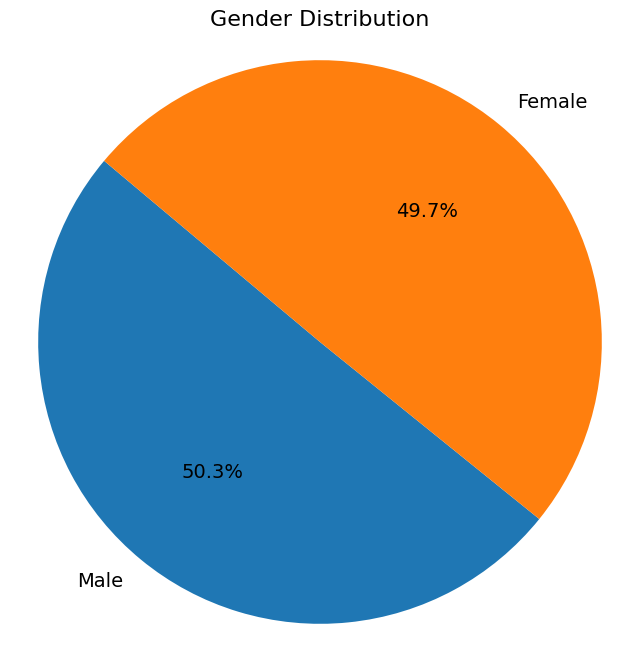

In [ ]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors= ['#1f77b4', '#ff7f0e'],
        textprops={'fontsize': 14})

plt.title('Gender Distribution', fontsize=16)
plt.axis('equal')
plt.show()

In [ ]:
# Calculating Total Revenue
total_revenue = df['Total Purchase Amount'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $552299723.00


Customer Segmentation

In [ ]:
def segment_customer(total_purchase):
    if total_purchase <= 800:
        return 'Low Value'
    elif total_purchase <= 3500:
        return 'Medium Value'
    else:
        return 'High Value'

In [ ]:
df['Customer Segment'] = df['Total Purchase Amount'].apply(segment_customer)

In [ ]:
segment_counts = df['Customer Segment'].value_counts()
segment_counts

,count
Customer Segment,
Medium Value,109494
High Value,70004
Low Value,23120


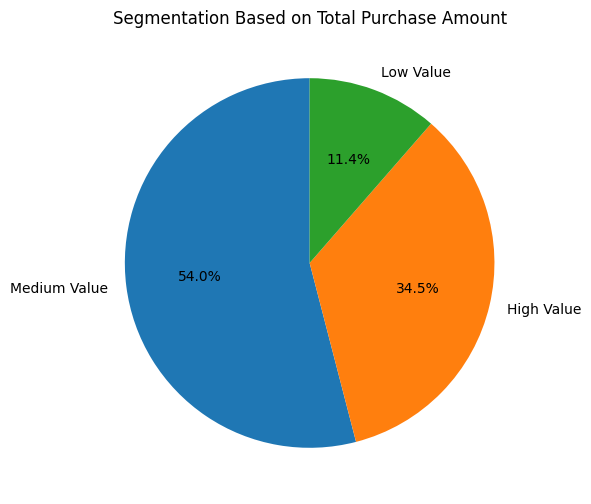

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Segmentation Based on Total Purchase Amount')
plt.show()

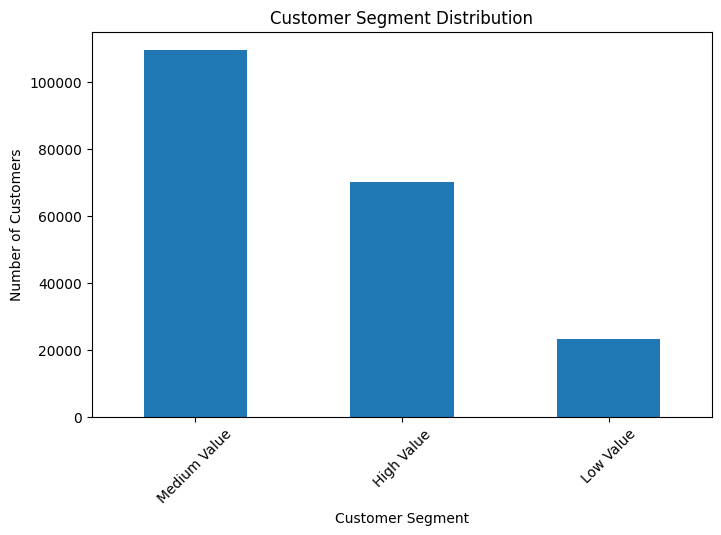

In [ ]:
# Plot the distribution of each segment as a bar chart
plt.figure(figsize=(8, 5))
segment_counts.plot(kind='bar')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Product Category Analysis:

In [ ]:
product_category_counts=df['Product Category'].value_counts()
product_category_counts

,count
Product Category,
Clothing,50754
Home,50741
Electronics,50704
Books,50419


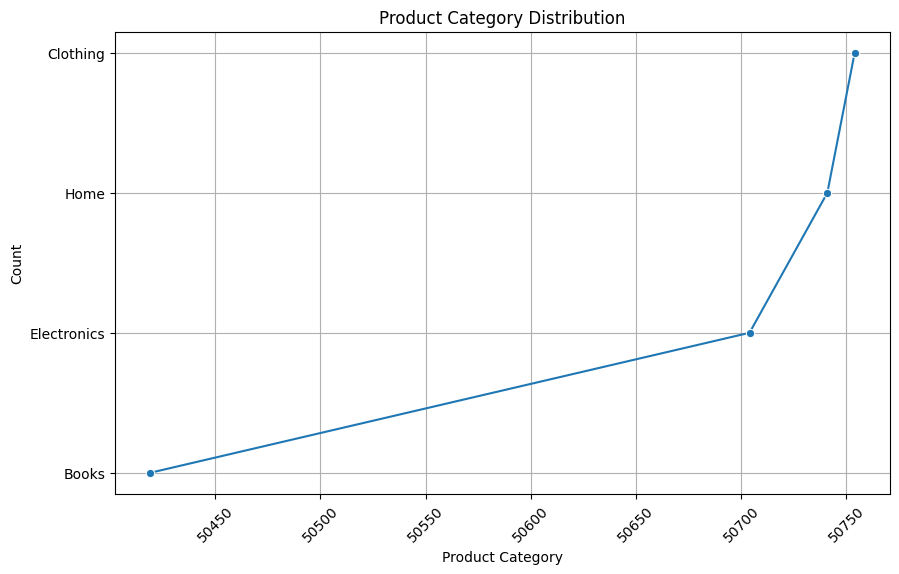

In [ ]:
# Create a DataFrame for plotting
product_category_df = product_category_counts.reset_index()
product_category_df.columns = ['Product Category', 'Count']

# Generate the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=product_category_df, y='Product Category', x='Count', marker='o')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


In [ ]:
# Total Sales by Product Category
product_category_sales = df.groupby('Product Category')['Total Purchase Amount'].sum()
product_category_sales = product_category_sales.sort_values(ascending=False)
product_category_sales


,Total Purchase Amount
Product Category,
Home,138906211
Clothing,138363540
Electronics,137884886
Books,137145086


<ipython-input-38-6fb7c68e6f90>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_category_sales_df, x='Product Category', y='Total Purchase Amount', palette='viridis', width=0.5)


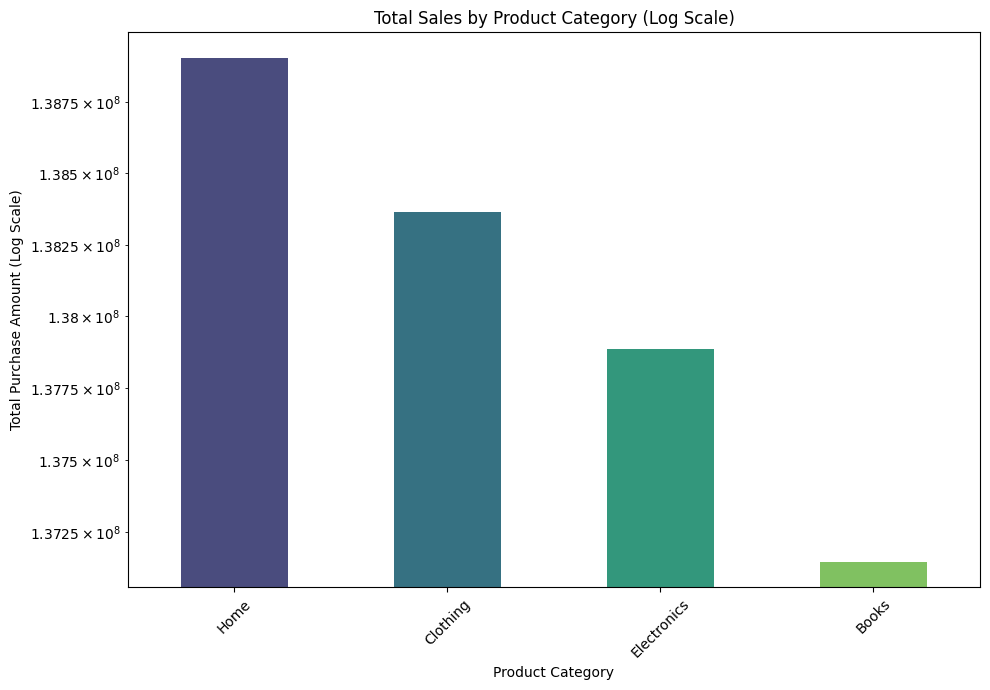

In [ ]:
# Convert Series to DataFrame for seaborn
product_category_sales_df = product_category_sales.reset_index()
product_category_sales_df.columns = ['Product Category', 'Total Purchase Amount']

# Create a bar plot with log scale on the y-axis
plt.figure(figsize=(10, 7))
sns.barplot(data=product_category_sales_df, x='Product Category', y='Total Purchase Amount', palette='viridis', width=0.5)
plt.yscale('log')  # Set log scale for y-axis

# Add labels and title
plt.title('Total Sales by Product Category (Log Scale)')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount (Log Scale)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Product Category Revenue Distribution

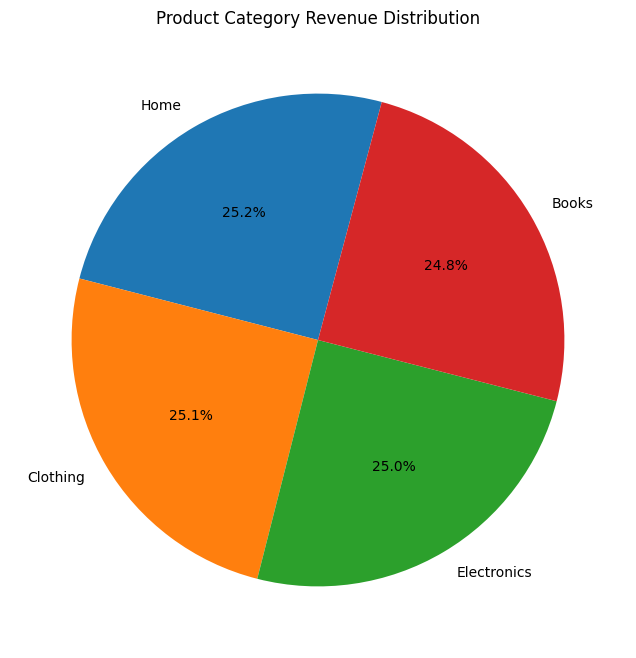

In [ ]:

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_category_sales_df['Total Purchase Amount'],
        labels=product_category_sales_df['Product Category'],
        autopct='%1.1f%%',
        startangle=75)

# Add a title
plt.title('Product Category Revenue Distribution')

# Display the chart
plt.show()


Returns Analysis

In [ ]:
# Calculate return rate
return_rate = df['Returns'].mean()
print(f'Return Rate: {return_rate:.2%}')

Return Rate: 50.08%


In [ ]:
# Calculate total lost revenue due to returns
total_lost_revenue = df[df['Returns'] == 1]['Total Purchase Amount'].sum()
print(f'Total Lost Revenue due to Returns: ${total_lost_revenue:.2f}')

Total Lost Revenue due to Returns: $276753766.00


In [ ]:
# Step 1: Group data by return status
returned_data = df[df['Returns'] == 1]
not_returned_data = df[df['Returns'] == 0]

# Step 2: Analyze return rates by product category
return_rate_by_category = returned_data['Product Category'].value_counts() / df['Product Category'].value_counts()
return_rate_by_category

,count
Product Category,
Books,0.503897
Clothing,0.498522
Electronics,0.501893
Home,0.499005


In [ ]:
# Step 3: Analyze return rates by customer groups
return_rate_by_customer_group = returned_data['Customer Segment'].value_counts() / df['Customer Segment'].value_counts()
return_rate_by_customer_group

,count
Customer Segment,
Medium Value,0.500265
High Value,0.501943
Low Value,0.500087


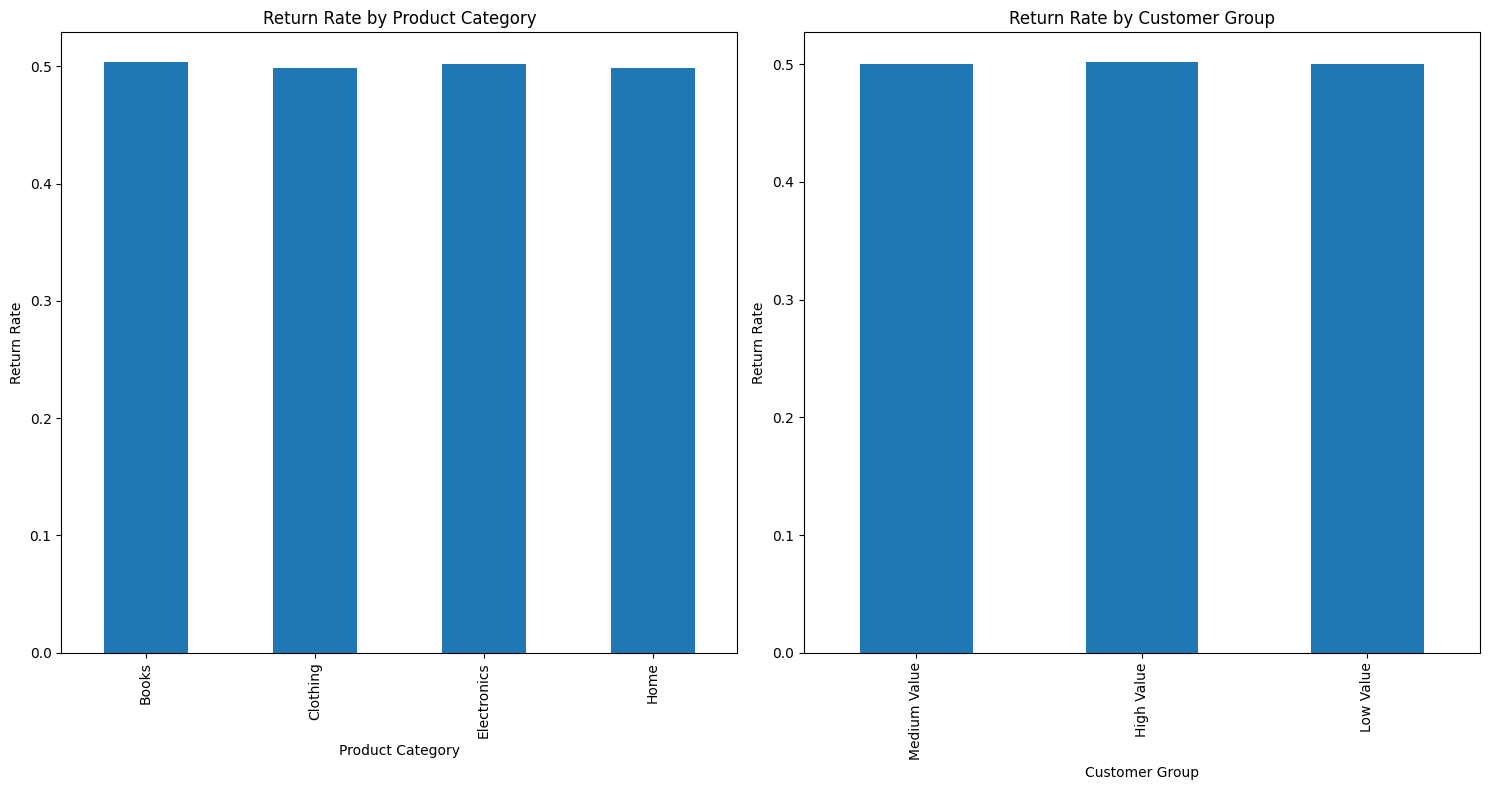

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Plot return rates by product category
plt.subplot(1, 2, 1)
return_rate_by_category.plot(kind='bar')
plt.title('Return Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Return Rate')

# Plot return rates by customer group
plt.subplot(1, 2, 2)
return_rate_by_customer_group.plot(kind='bar')
plt.title('Return Rate by Customer Group')
plt.xlabel('Customer Group')
plt.ylabel('Return Rate')

# Show the plots
plt.tight_layout()
plt.show()

Churn Analysis

In [ ]:
# Churn Rate:
churn_rate = df['Churn'].mean() * 100
print(f'Churn Rate: {churn_rate:.2f}%')

Churn Rate: 20.11%


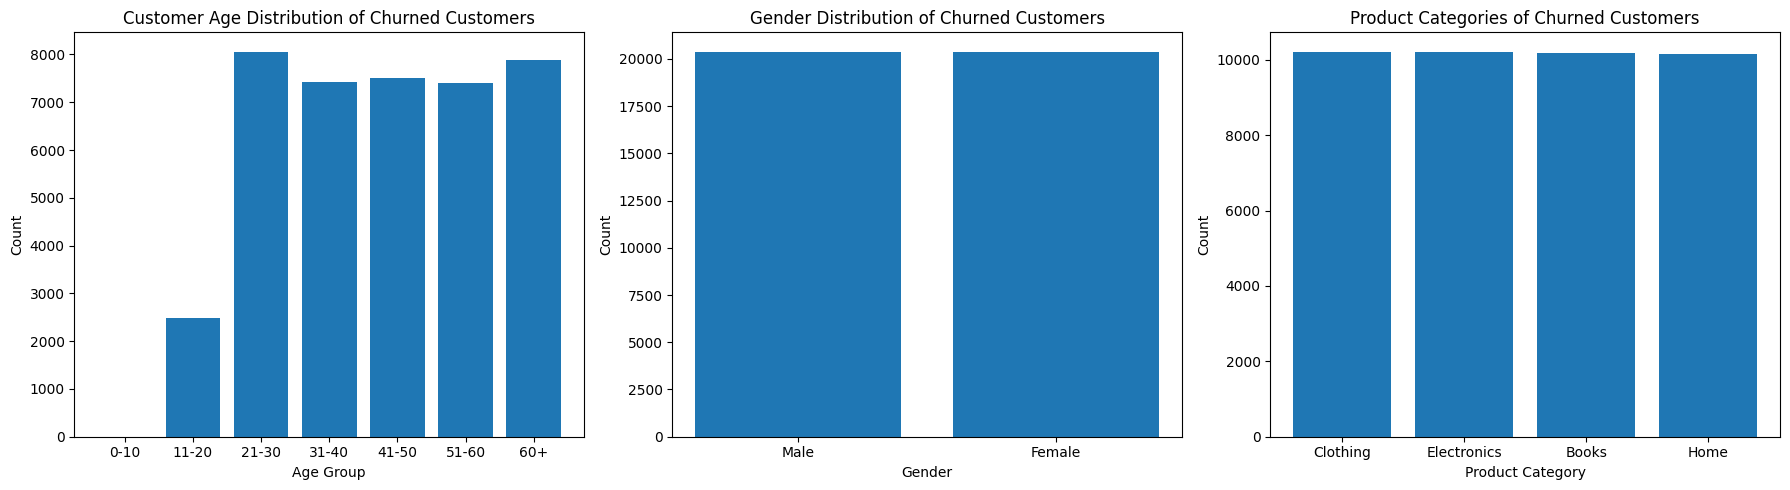

In [ ]:
# Filter churned customers (assuming 'Churn' column with values 0 for retained, 1 for churned)
churned_customers = df[df['Churn'] == 1]

# Analyze common characteristics of churned customers
churned_customer_info = churned_customers[['Customer ID', 'Total Purchase Amount', 'Product Category', 'Customer Age', 'Gender']]

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Customer Age Distribution with age bins
churned_age_bins = pd.cut(churned_customer_info['Customer Age'], bins=age_ranges, labels=age_labels)
age_counts = churned_age_bins.value_counts().reindex(age_labels, fill_value=0)
axes[0].bar(age_counts.index, age_counts.values)
axes[0].set_title('Customer Age Distribution of Churned Customers')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Plot Gender Distribution
churned_gender_counts = churned_customer_info['Gender'].value_counts()
axes[1].bar(churned_gender_counts.index, churned_gender_counts.values)
axes[1].set_title('Gender Distribution of Churned Customers')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Plot Product Category Distribution
churned_product_category_counts = churned_customer_info['Product Category'].value_counts()
axes[2].bar(churned_product_category_counts.index, churned_product_category_counts.values)
axes[2].set_title('Product Categories of Churned Customers')
axes[2].set_xlabel('Product Category')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

clv

In [ ]:
# Calculate overall CLV
average_purchase_value = df['Total Purchase Amount'].mean()
retention_rate = 1 - (churn_rate / 100)
clv = average_purchase_value / (1 - retention_rate)
print(f'Customer Lifetime Value (CLV): ${clv:.2f}')

Customer Lifetime Value (CLV): $13555.36


In [ ]:
# Calculate average purchase value and CLV for each customer segment
clv_by_segment = (df.groupby('Customer Segment')['Total Purchase Amount'].mean() / (1 - retention_rate))
# Identify high-value segments
high_value_segments = clv_by_segment[clv_by_segment >= 1000].index.tolist()

# Print CLV by segment
print("CLV by Segment:")
for segment, clv in clv_by_segment.items():
    print(f"{segment}: ${clv:.2f}")

CLV by Segment:
High Value: $21679.53
Low Value: $2524.58
Medium Value: $10690.43


In [ ]:
# Print high-value segments
print("High-Value Segments:")
print(high_value_segments)

High-Value Segments:
['High Value', 'Low Value', 'Medium Value']


Payment Method Analysis

In [ ]:
# Analyze payment methods
payment_method_counts = df['Payment Method'].value_counts()

# Print the payment method counts
print(payment_method_counts)

Payment Method
PayPal         67811
Credit Card    67517
Cash           67290
Name: count, dtype: int64


<ipython-input-60-6e5ae42f5586>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')


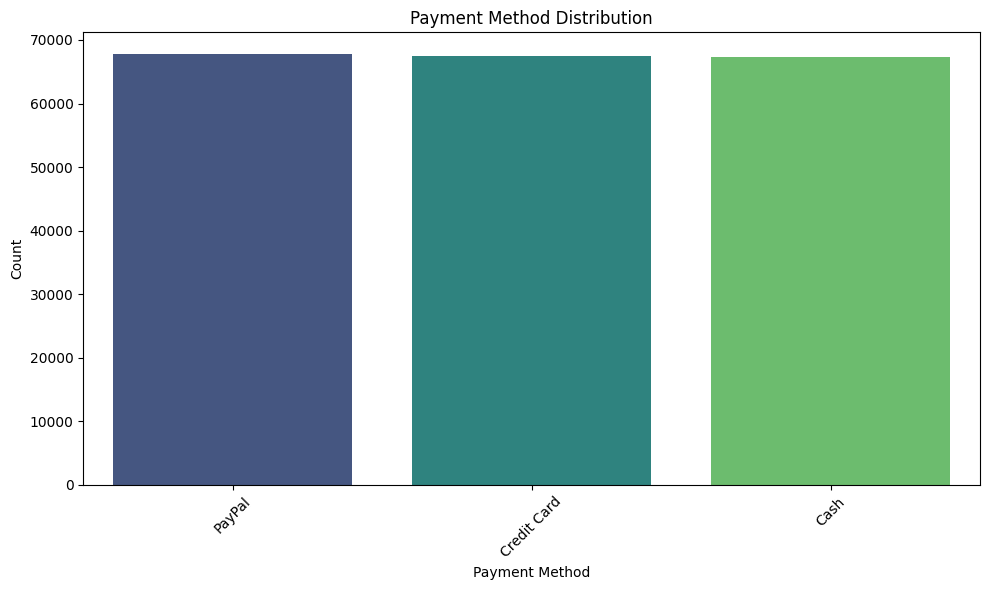

In [ ]:
# Create a bar plot for payment method distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze total purchase amount by payment method
payment_method_sales = df.groupby('Payment Method')['Total Purchase Amount'].sum().sort_values(ascending=False)

In [ ]:
# Print total purchase amount by payment method
print("\nTotal Purchase Amount by Payment Method:")
print(payment_method_sales)


Total Purchase Amount by Payment Method:
Payment Method
Credit Card    184799917
PayPal         184585493
Cash           182914313
Name: Total Purchase Amount, dtype: int64


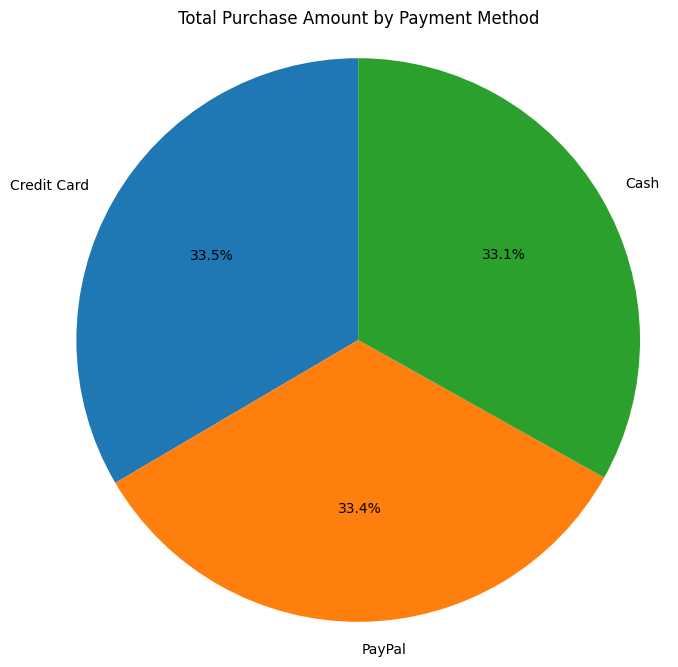

In [ ]:
# Create a pie chart for the total purchase amount by payment method
plt.figure(figsize=(8, 8))
plt.pie(payment_method_sales, labels=payment_method_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Purchase Amount by Payment Method')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

In [ ]:
df['month'] = df['Purchase Date'].dt.month
df['year'] = df['Purchase Date'].dt.year
# Group by month and calculate total amount per month
monthly_sales = df.groupby('month')['Total Purchase Amount'].sum().reset_index()
monthly_sales

,month,Total Purchase Amount
0,1,50295819
1,2,45980491
2,3,50417750
3,4,48996901
4,5,50955398
5,6,48934737
6,7,50436195
7,8,50991460
8,9,41609578
9,10,38214132


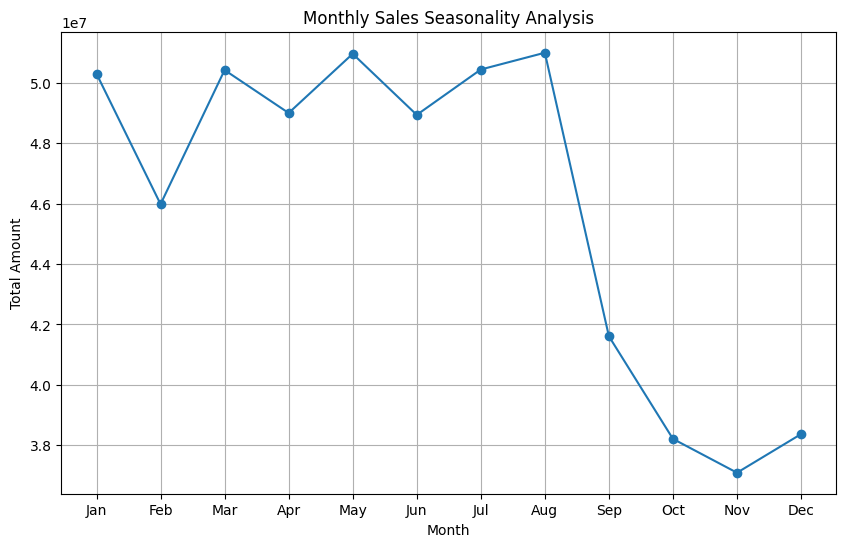

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month'], monthly_sales['Total Purchase Amount'], marker='o')
plt.title('Monthly Sales Seasonality Analysis')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(monthly_sales['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()
